In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [27]:
import os

base_path = '/content/drive/MyDrive/CallAnalysisProject'
os.makedirs(base_path, exist_ok=True)
os.makedirs(f'{base_path}/All_Conversations', exist_ok=True)
os.makedirs(f'{base_path}/visualizations', exist_ok=True)
print("Folders created successfully!")


Folders created successfully!


In [28]:
import os
from zipfile import ZipFile
zip_path = '/content/All_Conversations.zip'
extract_path = '/content/All_Conversations'
os.makedirs(extract_path, exist_ok=True)
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Data extracted successfully!")



Data extracted successfully!


In [29]:
os.listdir(extract_path)


['b8628a31-ef89-4218-b2a2-3058dbc4b106.json',
 '9fd0d7f9-16b0-4fe3-a090-88c64816c7da.json',
 'd1472118-ae60-47a2-a447-ee9b9bfdd0c1.json',
 'ecb08af4-0279-4178-a062-b82de0c701fb.json',
 '52823847-626b-4898-bbf9-1c7cd848c311.json',
 '66783778-028a-45ff-b1b0-f5c0ea759950.json',
 '179f40ff-742d-4703-94c4-430f631e3f83.json',
 'd3ee9bf9-cf64-468a-83da-fac5c6fb7a41.json',
 '8a7ed9a3-fc6d-4cff-88bf-da8236d1c834.json',
 'b1cc178e-4afc-4da6-8a41-d2fc61db8fef.json',
 '5a7eebc6-e089-44e9-aa0d-ef2e39ca11fb.json',
 '94ecf497-5959-44ec-a011-92af3709c38c.json',
 'd300835a-37e7-4da5-a998-c2203a674349.json',
 '29489f77-b8e0-462c-9286-9216d59890f1.json',
 '1f2c0aff-01cc-4a8e-926a-227527f67356.json',
 '86686c7b-df90-4b78-8785-b1891b047f26.json',
 '4832c70d-36a2-40be-a926-b596fd71dafe.json',
 '89ab3694-2c42-46bc-a602-c545511bf36e.json',
 'e25dcc91-27f8-4c0b-9869-496422ceb5c9.json',
 '1190bab7-d82f-4259-bb55-9617dff7da07.json',
 '41415d92-c12f-478a-b747-4d94773c2011.json',
 '54d23e27-49e7-4161-98f9-ff50c737

In [30]:
import yaml

sample_file = os.path.join(extract_path, os.listdir(extract_path)[0])
with open(sample_file, 'r') as file:
    conversation = yaml.safe_load(file)

print(conversation)



[{'speaker': 'Agent', 'text': 'Hello, this is Mark from XYZ Collections. How are you today?', 'stime': 0, 'etime': 5}, {'speaker': 'Customer', 'text': "What the hell do you want? I'm not in the mood for this crap!", 'stime': 4.5, 'etime': 10}, {'speaker': 'Agent', 'text': "I understand this may not be a good time. I'm calling regarding your outstanding balance. Can you please confirm your date of birth for identity verification?", 'stime': 9, 'etime': 20}, {'speaker': 'Customer', 'text': 'You think I’m just going to give you that? Screw off!', 'stime': 19, 'etime': 24}, {'speaker': 'Agent', 'text': 'I assure you, I can only proceed with verification after confirming your identity. Your privacy is important to us.', 'stime': 23, 'etime': 33}, {'speaker': 'Customer', 'text': 'What a joke! I don’t owe you anything, you idiots!', 'stime': 32, 'etime': 37}, {'speaker': 'Agent', 'text': 'I understand your frustration, but I must verify your information. Could you please provide your address?

In [31]:
import re

profane_words = [
    "hell", "crap", "screw", "idiots", "damn", "stupid", "jerk", "fool",
    "shut up", "moron", "dumb", "trash", "useless", "worthless", "loser",
    "annoying", "nonsense", "bullshit", "freak", "idiot"
]

profane_pattern = re.compile(r'\b(' + '|'.join(re.escape(word) for word in profane_words) + r')\b', re.IGNORECASE)

def detect_profanity(conversation, speaker_type):
    profane_utterances = []
    for utterance in conversation:
        if utterance['speaker'].lower() == speaker_type.lower() and profane_pattern.search(utterance['text']):
            profane_utterances.append({
                'text': utterance['text'],
                'stime': utterance['stime'],
                'etime': utterance['etime']
            })
    return profane_utterances

agent_profanity = detect_profanity(conversation, 'Agent')
customer_profanity = detect_profanity(conversation, 'Customer')

print("Profane utterances by Agent:")
for utterance in agent_profanity:
    print(utterance)

print("\nProfane utterances by Customer:")
for utterance in customer_profanity:
    print(utterance)


Profane utterances by Agent:

Profane utterances by Customer:
{'text': "What the hell do you want? I'm not in the mood for this crap!", 'stime': 4.5, 'etime': 10}
{'text': 'You think I’m just going to give you that? Screw off!', 'stime': 19, 'etime': 24}
{'text': 'What a joke! I don’t owe you anything, you idiots!', 'stime': 32, 'etime': 37}
{'text': 'I don’t have to pay a damn thing! You can go to hell!', 'stime': 61, 'etime': 67}


In [34]:
sensitive_keywords = ["balance", "account", "payment", "due", "outstanding"]
verification_keywords = ["date of birth", "address", "social security number", "identity verification"]

sensitive_pattern = re.compile(r'\b(' + '|'.join(re.escape(word) for word in sensitive_keywords) + r')\b', re.IGNORECASE)
verification_pattern = re.compile(r'\b(' + '|'.join(re.escape(word) for word in verification_keywords) + r')\b', re.IGNORECASE)

def detect_non_compliance(conversation):
    non_compliant_calls = []
    verified = False
    for utterance in conversation:
        if utterance['speaker'].lower() == 'customer' and verification_pattern.search(utterance['text']):
            verified = True
        elif utterance['speaker'].lower() == 'agent' and sensitive_pattern.search(utterance['text']) and not verified:
            non_compliant_calls.append({
                'text': utterance['text'],
                'stime': utterance['stime'],
                'etime': utterance['etime']
            })
    return non_compliant_calls

non_compliance_cases = detect_non_compliance(conversation)

print("\nNon-compliant utterances by Agent:")
for utterance in non_compliance_cases:
    print(utterance)



Non-compliant utterances by Agent:
{'text': "I understand this may not be a good time. I'm calling regarding your outstanding balance. Can you please confirm your date of birth for identity verification?", 'stime': 9, 'etime': 20}
{'text': 'Thank you for that information. Now, I see a balance of $500 on your account. How would you like to address this?', 'stime': 52, 'etime': 62}
{'text': 'I understand this is not easy to discuss. However, we can work out a payment plan that suits you.', 'stime': 66, 'etime': 76}


In [35]:
def calculate_call_metrics(conversation):
    total_duration = conversation[-1]['etime'] - conversation[0]['stime']
    overtalk_duration = 0
    silence_duration = 0
    last_etime = 0

    for i in range(len(conversation)):
        stime = conversation[i]['stime']
        etime = conversation[i]['etime']

        if stime > last_etime:
            silence_duration += stime - last_etime

        if i > 0 and conversation[i-1]['etime'] > stime:
            overtalk_duration += conversation[i-1]['etime'] - stime

        last_etime = max(last_etime, etime)

    silence_percentage = (silence_duration / total_duration) * 100
    overtalk_percentage = (overtalk_duration / total_duration) * 100

    return silence_percentage, overtalk_percentage

silence_percentage, overtalk_percentage = calculate_call_metrics(conversation)

print(f"\nSilence Percentage: {silence_percentage:.2f}%")
print(f"Overtalk Percentage: {overtalk_percentage:.2f}%")




Silence Percentage: 0.00%
Overtalk Percentage: 13.50%


Saved the chart as call_quality_metrics.png


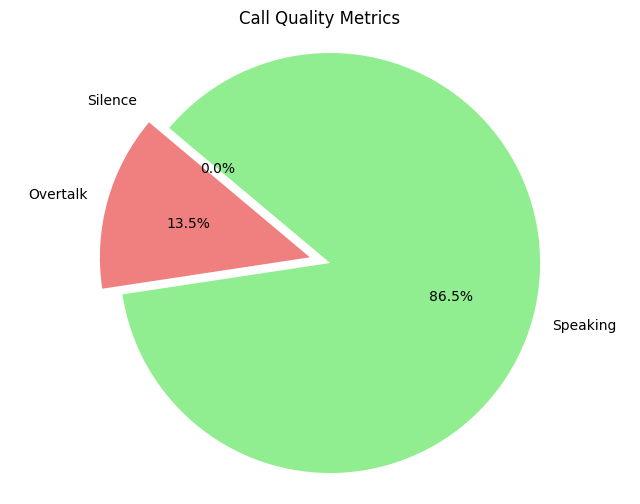

In [38]:
import matplotlib.pyplot as plt

def visualize_metrics(silence_percentage, overtalk_percentage, save_path=None):
    labels = ['Silence', 'Overtalk', 'Speaking']
    speaking_percentage = 100 - silence_percentage - overtalk_percentage
    sizes = [silence_percentage, overtalk_percentage, speaking_percentage]
    colors = ['lightblue', 'lightcoral', 'lightgreen']
    explode = (0.1, 0.1, 0)

    plt.figure(figsize=(8, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title("Call Quality Metrics")
    plt.axis('equal')

    if save_path:
        plt.savefig(save_path)
        print(f"Saved the chart as {save_path}")
    else:
        plt.show()

save_path = "call_quality_metrics.png"
visualize_metrics(silence_percentage, overtalk_percentage, save_path)
